In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import joblib

# Procedure

### The data is explored for statistics and datatypes.
### The numeric columns are extracted and binned into min-25%, 25%-50,50%-75% and 75%-max ranges and replaced with the range mean.
### The job roles are clubbed using similarities.
### All non-numeric columns are one-hot encoded

In [2]:
def binRanges(x,stats):
    if x<=stats[4]:
        return (stats[3]+stats[4])/2
    elif stats[4]<x<=stats[5]:
        return (stats[4]+stats[5])/2
    elif stats[5]<x<=stats[6]:
        return (stats[5]+stats[6])/2
    elif x>stats[6]:
        return (stats[6]+stats[7])/2
        
def club(role):
    if role == 'Developer' or role=='Engineer' or role == 'Testing' or role == 'Associate':
        return 'Engineer'
    elif role == 'Administrator' or role == 'Support':
        return 'system admin'
    elif role == 'UX' or role=='Architect' or role=='Designer':
        return 'Designer'
    elif role=='Auditor' or role=='Manager':
        return 'Manager'
    else :
        return role
def grid(x_,test_size,alphas,filename):
    i=0
    for t in test_size:
        j=0
        X_train, X_test, y_train, y_test = train_test_split(x_, y, stratify=y,random_state=1,test_size=t)
        for a in alphas:
            #clf = MLPClassifier(hidden_layer_sizes=(300,200,100),alpha=a ,max_iter=200).fit(X_train, y_train)
            #joblib.dump(clf,f"pickledfiles/{filename}{i}{j}.pkl")
            clf = joblib.load(f"pickledfiles/{filename}{i}{j}.pkl")
            j+=1
            print(f"""score with test size: {t} and alpha:{a}:    {clf.score(X_test,y_test)}""")
            print(f"""confusion-matrix with test size: {t} and alpha:{a}:""")
            print(confusion_matrix(clf.predict(X_test),y_test))
        i+=1

In [3]:
df = pd.read_csv('roo_data.csv')
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

# Preprocessing

In [5]:
numericCols= df.select_dtypes('int64').columns

In [6]:
for col in numericCols:
    stats = df.describe()[col]
    df[col] = df[col].apply(lambda x: binRanges(x,stats))



In [7]:
jobs = pd.DataFrame(df['Suggested Job Role'])
df_ = df.drop('Suggested Job Role',axis=1)
x = pd.get_dummies(df_,columns=df_.select_dtypes('object').columns)
jobs['new roles']=jobs['Suggested Job Role'].apply(lambda x: x.split(' ')[-1] )
jobs['new roles clubbed']=jobs['new roles'].apply(lambda x: club(x))
y = jobs['new roles clubbed']
# X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y,random_state=1,test_size=0.4)

df_['Y']=y


# Processed Data

In [8]:
df_

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Y
0,72.5,64.0,81.5,90.0,89.5,90.0,90.0,81.5,64.0,9.0,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Engineer
1,81.5,64.0,72.5,64.0,72.5,72.5,72.5,81.5,90.0,11.0,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,system admin
2,72.5,81.5,90.0,90.0,64.0,81.5,72.5,72.5,90.0,11.0,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,system admin
3,72.5,90.0,64.0,81.5,89.5,72.5,64.0,90.0,72.5,7.0,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,system admin
4,90.0,64.0,90.0,64.0,72.5,90.0,72.5,72.5,72.5,5.0,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,81.5,64.0,64.0,64.0,81.0,72.5,90.0,81.5,72.5,5.0,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Engineer
19996,81.5,72.5,81.5,90.0,81.0,64.0,64.0,90.0,64.0,7.0,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,Analyst
19997,81.5,72.5,81.5,90.0,64.0,81.5,72.5,90.0,90.0,7.0,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Analyst
19998,64.0,90.0,90.0,90.0,64.0,72.5,64.0,90.0,64.0,5.0,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Engineer


# PCA and LDA 
### For dimensionality reduction as a part of the preprocessing.
### 2-D PCA plot additionally helps to visualise the distribution with respect to the original classes.


<AxesSubplot:xlabel='0', ylabel='1'>

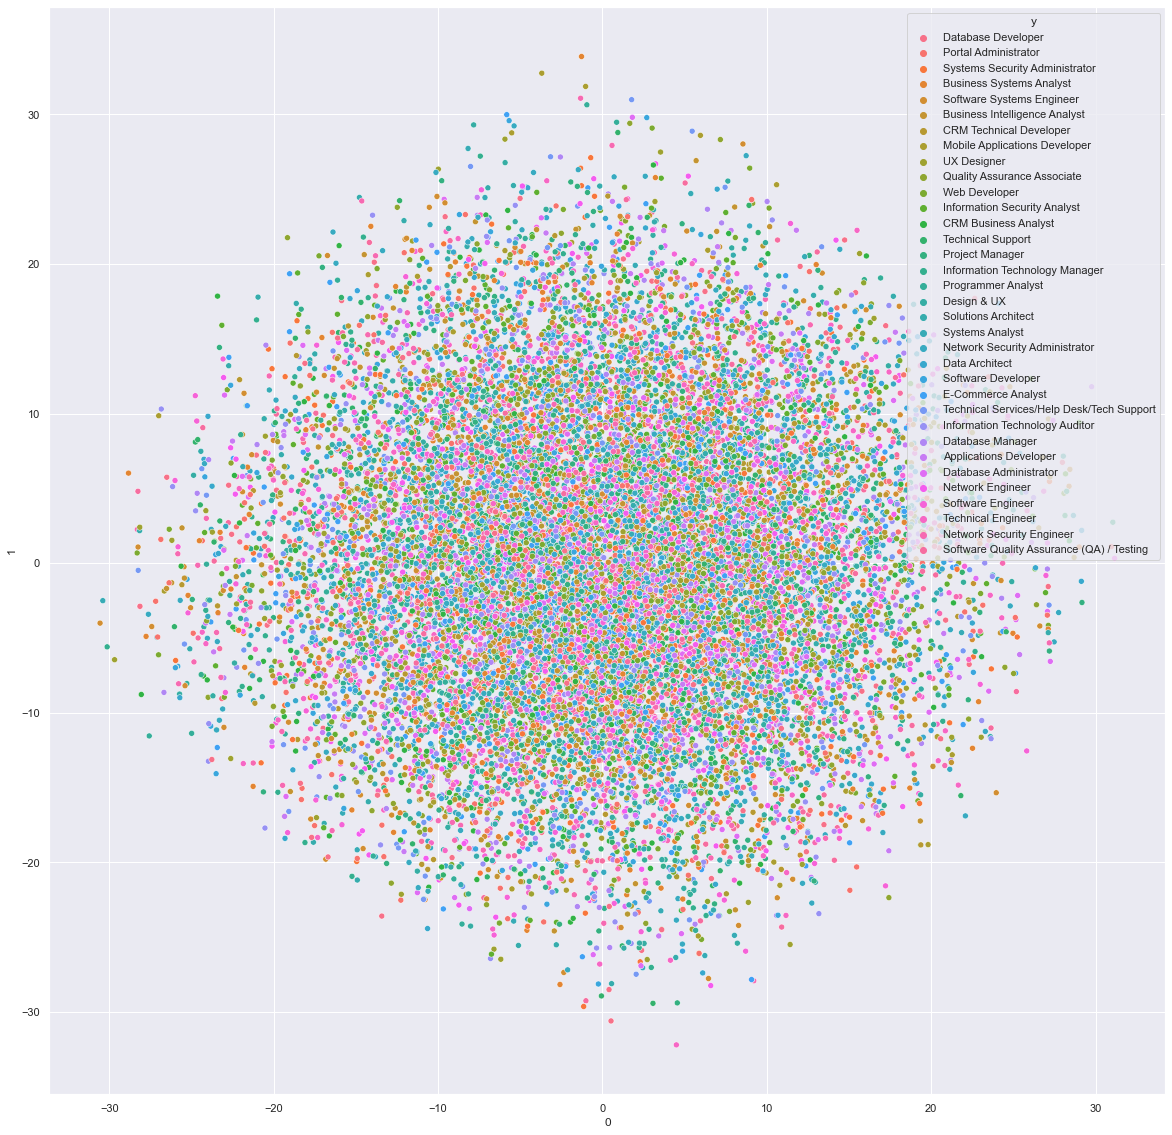

In [9]:
pca = PCA(n_components=2)
xpca = pca.fit_transform(x)
dfpca = pd.DataFrame(xpca)
dfpca['y']=df['Suggested Job Role']

lda = LDA(n_components=4)
xlda = lda.fit_transform(x,df['Suggested Job Role'])

sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x=dfpca[0],y=dfpca[1],hue=dfpca.y)

# Fitting on Grid

### With Test sizes of 0.2,0.25,0.3,0.35,0.4 respectively
### alpha values of .0000001,0.0001,0.001,0.01,0,1 respectively

In [10]:
ts= [0.2,0.25,0.3,0.35,0.4]
a=[0.0000001,0.0001,0.001,0.01,0,1]

In [11]:

grid(xpca,ts,a,"pca")

score with test size: 0.2 and alpha:1e-07:    0.37325
confusion-matrix with test size: 0.2 and alpha:1e-07:
[[   4    3    8    2    4]
 [   2    1    2    2    1]
 [ 764  455 1471  455  774]
 [   0    0    0    0    0]
 [   5    5   20    5   17]]
score with test size: 0.2 and alpha:0.0001:    0.365
confusion-matrix with test size: 0.2 and alpha:0.0001:
[[   5    3   21    2    7]
 [   1    1    3    1    1]
 [ 752  445 1430  446  766]
 [   0    1    1    4    2]
 [  17   14   46   11   20]]
score with test size: 0.2 and alpha:0.001:    0.37275
confusion-matrix with test size: 0.2 and alpha:0.001:
[[   5    4   14    1    3]
 [   3    2    1    1    0]
 [ 760  455 1472  456  781]
 [   0    0    0    0    0]
 [   7    3   14    6   12]]
score with test size: 0.2 and alpha:0.01:    0.3745
confusion-matrix with test size: 0.2 and alpha:0.01:
[[   0    3    5    1    3]
 [   0    0    0    0    0]
 [ 773  461 1495  462  790]
 [   0    0    0    0    0]
 [   2    0    1    1    3]]
score w

In [12]:
grid(xlda,ts,a,"lda")

score with test size: 0.2 and alpha:1e-07:    0.2825
confusion-matrix with test size: 0.2 and alpha:1e-07:
[[ 82  57 180  51  89]
 [ 44  31 120  32  45]
 [458 265 831 266 453]
 [ 41  16  84  21  44]
 [150  95 286  94 165]]
score with test size: 0.2 and alpha:0.0001:    0.31
confusion-matrix with test size: 0.2 and alpha:0.0001:
[[109  74 178  49  92]
 [ 23  15  48  16  22]
 [496 292 963 299 509]
 [ 42  23 103  35  55]
 [105  60 209  65 118]]
score with test size: 0.2 and alpha:0.001:    0.26875
confusion-matrix with test size: 0.2 and alpha:0.001:
[[121  80 262  78 123]
 [ 45  33  94  20  45]
 [395 216 740 234 420]
 [ 40  24  81  21  48]
 [174 111 324 111 160]]
score with test size: 0.2 and alpha:0.01:    0.2925
confusion-matrix with test size: 0.2 and alpha:0.01:
[[ 57  28 148  40  65]
 [ 67  52 122  52  79]
 [519 298 933 296 499]
 [ 34  17  83  14  39]
 [ 98  69 215  62 114]]
score with test size: 0.2 and alpha:0:    0.2795
confusion-matrix with test size: 0.2 and alpha:0:
[[127  90 

In [13]:
grid(x,ts,a,"untransformed")

score with test size: 0.2 and alpha:1e-07:    0.25825
confusion-matrix with test size: 0.2 and alpha:1e-07:
[[150  92 269  76 152]
 [ 69  35 164  43  91]
 [343 188 624 192 314]
 [ 76  42 135  51  66]
 [137 107 309 102 173]]
score with test size: 0.2 and alpha:0.0001:    0.24225
confusion-matrix with test size: 0.2 and alpha:0.0001:
[[125  79 266  77 143]
 [105  66 166  60  83]
 [296 180 529 169 300]
 [ 88  43 170  57  78]
 [161  96 370 101 192]]
score with test size: 0.2 and alpha:0.001:    0.2435
confusion-matrix with test size: 0.2 and alpha:0.001:
[[143  96 273  89 171]
 [106  50 194  62  80]
 [306 186 567 184 303]
 [ 60  42 135  39  67]
 [160  90 332  90 175]]
score with test size: 0.2 and alpha:0.01:    0.25175
confusion-matrix with test size: 0.2 and alpha:0.01:
[[145 104 281  81 151]
 [ 93  53 181  57  78]
 [326 190 607 186 349]
 [ 65  25 148  49  65]
 [146  92 284  91 153]]
score with test size: 0.2 and alpha:0:    0.26175
confusion-matrix with test size: 0.2 and alpha:0:
[[124

### confusion matrix visualisation of a reasonable outcome

In [14]:
# score with test size: 0.4 and alpha:0:    0.27575
# confusion-matrix with test size: 0.4 and alpha:0:


X_train, X_test, y_train, y_test = train_test_split(xlda, y, stratify=y,random_state=1,test_size=0.4)

# clf = MLPClassifier(hidden_layer_sizes=(300,200,100),alpha=0 ,max_iter=200).fit(X_train, y_train)
# joblib.dump(clf,"pickledfiles/opt.pkl")
clf = joblib.load("pickledfiles/opt.pkl")

cm = confusion_matrix(clf.predict(X_test),y_test)



In [15]:
cm

array([[ 206,  126,  440,  135,  219],
       [  84,   52,  142,   43,   81],
       [ 891,  524, 1719,  529,  893],
       [ 112,   65,  200,   61,  112],
       [ 257,  161,  500,  160,  288]])

<AxesSubplot:>

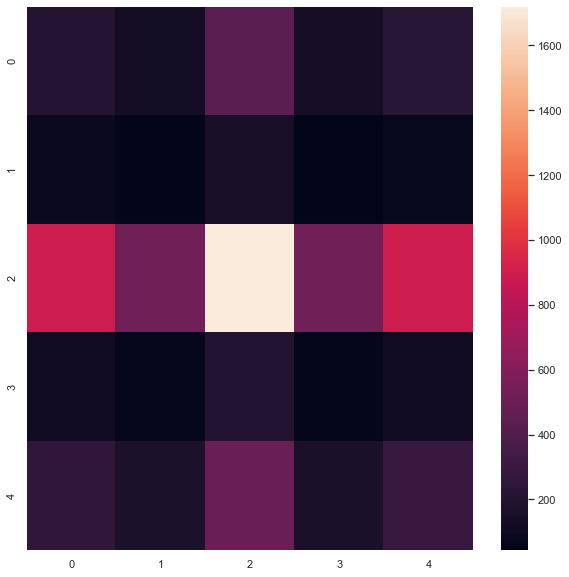

In [16]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cm)

# Conclusion

### The data shows a reasonable class distribution in the confusion matrix for lower values of accuracies
### As we reach higher accuracy the class distribution tends to get imbalanced.
### For most train-test ratio, smaller value of the alpha value tends to give a more balanced confusion matrix
